In [11]:
#imprt necessary packages
import pandas as pd
import glob
import os.path
import time
import nltk
import re 
import textblob
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS 
from textblob.sentiments import NaiveBayesAnalyzer
from textblob import TextBlob
import matplotlib.pyplot as plt 
nltk.download('stopwords') 
nltk.download('wordnet') 

[nltk_data] Downloading package stopwords to C:\Users\Chithra
[nltk_data]     Menon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Chithra
[nltk_data]     Menon\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
##dir_path = os.path.abspath(os.path.dirname(__file__)) 
##input_path = os.path.join(dir_path,'Dataset')

#Get Russian Troll Data from CSV files and combine them into one large file of approx 3M rows
path = r'C:\Users\Chithra Menon\Downloads\RussianTrolls'
all_trollfiles = glob.glob(os.path.join(path, "*.csv"))

df_from_each_file = (pd.read_csv(f, dtype='str') for f in all_trollfiles)
df = pd.concat(df_from_each_file, ignore_index=True)


In [5]:
#Preprocessing
#select necessary rows from the dataframe
df = df[['author','content', 'language', 'publish_date','account_type', 'account_category', 'retweet']]

#select only rows with language english
df = df[df['language'] == 'English']

#remove URLs from the tweet content
df['content'] = df['content'].str.replace('https?:\/\/.*[\r\n]*', '')

#remove non ASCII characters from tweets
df['content'] = df['content'].str.encode('ascii', 'ignore').str.decode('ascii')

#remove words starting with @username as its not relevant to our classification
df['content'] = df['content'].str.replace('@(.+?)[\s,.;]', '')

#remove words starting with & as they represent HTML character reference 
df['content'] = df['content'].str.replace('&(.+?)[\s,.;]', '')

#remove numerics and special characters except # from the string
df['content'] = df['content'].str.replace('[^a-zA-Z#\s]', '')

#Extract hastags from troll tweets
df['hashtags'] = '#' + (df['content'].str.extract(r'#(.+?)[\s.,;]'))

In [6]:
#remove stop words
stop = stopwords.words('english')
pat = r'\b(?:{})\b'.format('|'.join(stop))

#Russian Troll data
df['content_without_stopwords'] = df['content'].str.replace(pat, '')
df['content_without_stopwords'] = df['content_without_stopwords'].str.replace(r'\s+', ' ')

In [7]:
#Tokenizing and Lemmatization
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    lemmatized_output = ' '.join(lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text))
    return lemmatized_output
    #return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]


df.fillna('', inplace=True) 

df['text_lemmatized'] = df.content_without_stopwords.apply(lemmatize_text)

#convert tweet into lower case
df['text_lemmatized'] = [entry.lower() for entry in df['text_lemmatized']]

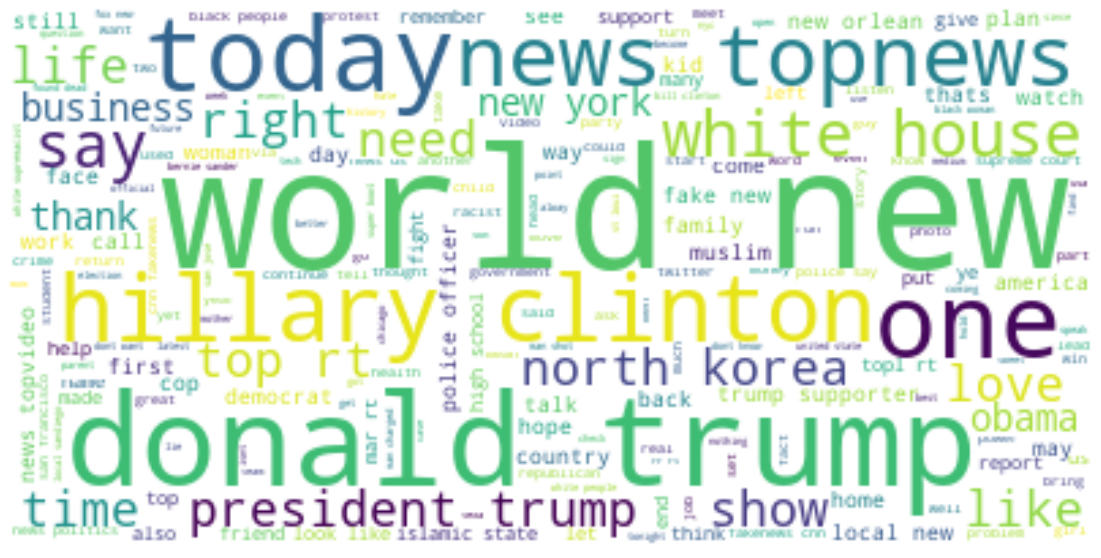

In [17]:
#Wordcloud for troll tweets 

#initilize cloud characteristics
cloud = WordCloud(background_color="white", max_words=1000, stopwords=stopwords.words('english'))

#define word cloud
wordcloud = cloud.generate(df['text_lemmatized'].str.cat(sep='\n'))

# Display the cloud for Left:
plt.figure(figsize=[20,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [23]:
#Sentiments analysis with textblob

#df['blob'] = TextBlob(df['text_lemmatized'], analyzer = NaiveBayesAnalyzer())


def sentiment_calc(text):
    try:
        return TextBlob(text).sentiment
    except:
        return None

df['sentiment'] = df['text_lemmatized'].apply(sentiment_calc)


In [24]:
df.head()

,author,content,language,publish_date,account_type,account_category,retweet,hashtags,content_without_stopwords,text_lemmatized,sentiment
0,10_GOP,We have a sitting Democrat US Senator on trial...,English,10/1/2017 19:58,Right,RightTroll,0,,We sitting Democrat US Senator trial corruptio...,we sitting democrat us senator trial corruptio...,"(0.05, 0.1)"
1,10_GOP,Marshawn Lynch arrives to game in antiTrump sh...,English,10/1/2017 22:43,Right,RightTroll,0,,Marshawn Lynch arrives game antiTrump shirt Ju...,marshawn lynch arrives game antitrump shirt ju...,"(-0.4, 0.4)"
2,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,English,10/1/2017 22:50,Right,RightTroll,1,#BoycottNFL,Daughter fallen Navy Sailor delivers powerful ...,daughter fallen navy sailor delivers powerful ...,"(0.3, 1.0)"
3,10_GOP,JUST IN President Trump dedicates Presidents C...,English,10/1/2017 23:52,Right,RightTroll,0,,JUST IN President Trump dedicates Presidents C...,just in president trump dedicates presidents c...,"(0.0, 0.0)"
4,10_GOP,RESPECTING our National Anthem #StandForOurAn...,English,10/1/2017 2:13,Right,RightTroll,1,#StandForOurAnthem,RESPECTING National Anthem #StandForOurAnthem,respecting national anthem #standforouranthem,"(0.0, 0.0)"


In [27]:
df.to_csv('sentiment.csv', sep=',', encoding='utf-8')

In [41]:
df.head()

,author,content,language,publish_date,account_type,account_category,retweet,hashtags,content_without_stopwords,text_lemmatized,sentiment,polarity,sentiment_tweet
0,10_GOP,We have a sitting Democrat US Senator on trial...,English,10/1/2017 19:58,Right,RightTroll,0,,We sitting Democrat US Senator trial corruptio...,we sitting democrat us senator trial corruptio...,"(0.05, 0.1)",0.05,positive
1,10_GOP,Marshawn Lynch arrives to game in antiTrump sh...,English,10/1/2017 22:43,Right,RightTroll,0,,Marshawn Lynch arrives game antiTrump shirt Ju...,marshawn lynch arrives game antitrump shirt ju...,"(-0.4, 0.4)",-0.40,negative
2,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,English,10/1/2017 22:50,Right,RightTroll,1,#BoycottNFL,Daughter fallen Navy Sailor delivers powerful ...,daughter fallen navy sailor delivers powerful ...,"(0.3, 1.0)",0.30,positive
3,10_GOP,JUST IN President Trump dedicates Presidents C...,English,10/1/2017 23:52,Right,RightTroll,0,,JUST IN President Trump dedicates Presidents C...,just in president trump dedicates presidents c...,"(0.0, 0.0)",0.00,neutral
4,10_GOP,RESPECTING our National Anthem #StandForOurAn...,English,10/1/2017 2:13,Right,RightTroll,1,#StandForOurAnthem,RESPECTING National Anthem #StandForOurAnthem,respecting national anthem #standforouranthem,"(0.0, 0.0)",0.00,neutral


In [40]:
#df['polarity'] = [x[0] for x in df['sentiment']]
#df['sentiment_tweet'] = df.polarity.apply(lambda x: 'positive' if x > 0 else 'negative')

def polarity_calc(x):
        y = 'neutral'
        if (x > 0):
            y = 'positive'
        if (x < 0):
            y = 'negative'
        return y


df['sentiment_tweet'] = df['polarity'].apply(polarity_calc)

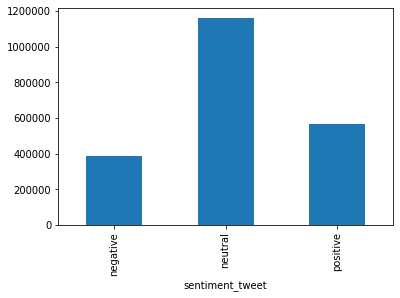

In [42]:
#plot sentiments

groups = df.groupby(['sentiment_tweet']).size()
groups.plot.bar()